**Question of Interest**

Which features drive song popularity? 

In [41]:
import numpy as np 
import pandas as pd 
import seaborn as sns  
from matplotlib import pyplot as plt # for plotting
%matplotlib inline
sns.set_style("whitegrid")
import warnings 
warnings.filterwarnings("ignore")

In [42]:
# Reading in data
df = pd.read_csv('SpotifyFeatures.csv')
df.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


In [43]:
# Checking for empty cells
pd.isnull(df).sum()

genre               0
artist_name         0
track_name          0
track_id            0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
dtype: int64

In [44]:
# Converting categorical variable 'key' into a numerical variable
list_of_keys = df['key'].unique()
key_to_idx = {key: idx for idx, key in enumerate(list_of_keys)}
df['key'] = df['key'].map(key_to_idx)

In [45]:
# Converting categorical variable 'mode' into a numerical variable
df["mode"].replace({"Major": 1, "Minor": 0}, inplace=True)

In [46]:
# Converting 'time_signature' values from floating to integer
unique_time_signatures = df['time_signature'].unique()
time_signature_dict = {value: index for index, value in enumerate(unique_time_signatures)}
df['time_signature'] = df['time_signature'].map(time_signature_dict)

In [47]:
# Checking that data was correctly transformed
df.sample(10)

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
76640,Children's Music,Preschool Kids,My Bonnie Lies Over the Ocean (Vibraphone),1YswM1OOAvdBlpBhed4dVB,0,0.9880,0.417,106998,0.41200,0.96900,10,0.2560,-14.275,1,0.1130,184.829,2,0.845
137966,Reggae,Slightly Stoopid,I Metal,19XhpZA7UDR4vp777CEkWj,21,0.0736,0.503,87453,0.98800,0.00000,10,0.3080,-3.178,1,0.2880,95.080,0,0.282
200477,Soundtrack,Ludwig Goransson,Entering Jabariland,31B4j87tSrvdyDXQVeKAc4,35,0.8470,0.293,162619,0.25400,0.88000,2,0.1160,-20.809,1,0.0678,152.588,2,0.039
93533,Indie,José González,Stay Alive,0ZNYGrmcehorhh9JOeg5Iv,70,0.7360,0.718,266907,0.30200,0.16300,1,0.0887,-12.086,1,0.0372,129.999,0,0.333
175406,Comedy,Andy Ritchie,"Third World, Second Hand",6iqWqNhMj1mhZE8oyvG1td,13,0.8260,0.551,432402,0.70600,0.00000,7,0.4100,-7.202,1,0.8940,74.569,2,0.642
189080,Ska,The Living End,Growing Up - Falling Down,517vKKe6SMZRF1NkLCCJvg,23,0.0103,0.223,234027,0.96700,0.00000,8,0.3290,-4.293,1,0.0983,175.720,0,0.534
91324,Hip-Hop,Q-Tip,Breathe And Stop,7nDtDxsKJ3fho8xEmU65JJ,51,0.0144,0.881,243867,0.83000,0.00771,4,0.0626,-4.563,1,0.1720,98.793,0,0.765
184027,Movie,Randy Newman,Victory - Score,6ukQL37UsLklyr8d6BW5CQ,11,0.8280,0.233,153147,0.40800,0.91900,4,0.5050,-14.257,1,0.0719,79.073,0,0.129
104667,Classical,Ludwig van Beethoven,"Diabelli Variations, Op. 120: Variation 24. Fu...",33EC1pjRTq8Uzhl8H5JJhW,25,0.9950,0.456,214187,0.00811,0.93800,2,0.0571,-40.576,1,0.0618,113.532,0,0.354
75457,Children's Music,Juice Music,Doctor Knickerbocker,2B9HvzigQcPKW0Re53IGjh,8,0.2350,0.844,146564,0.41700,0.00343,10,0.1320,-14.220,1,0.2510,169.771,0,0.845


# Feature Definitions

acousticness | number <float>
A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.

danceability | number <float>
Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.

duration_ms | integer
The duration of the track in milliseconds.

energy | number <float>
Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.

instrumentalness | number <float>
Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.

key | integer
The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1.
            
liveness | number <float>
Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live. 

loudness | number <float>
The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typically range between -60 and 0 db.

mode | integer
Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.

speechiness | number <float>
Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.

tempo | number <float>
The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.
    
time_signature | integer
An estimated time signature. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure). The time signature ranges from 3 to 7 indicating time signatures of "3/4", to "7/4".
    
valence | number <float>
A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).

In [48]:
df.describe()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
count,232725.000000,232725.000000,232725.000000,2.327250e+05,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000
mean,41.127502,0.368560,0.554364,2.351223e+05,0.570958,0.148301,5.279085,0.215009,-9.569885,0.652031,0.120765,117.666585,0.263470,0.454917
std,18.189948,0.354768,0.185608,1.189359e+05,0.263456,0.302768,3.528256,0.198273,5.998204,0.476327,0.185518,30.898907,0.684772,0.260065
min,0.000000,0.000000,0.056900,1.538700e+04,0.000020,0.000000,0.000000,0.009670,-52.457000,0.000000,0.022200,30.379000,0.000000,0.000000
25%,29.000000,0.037600,0.435000,1.828570e+05,0.385000,0.000000,2.000000,0.097400,-11.771000,0.000000,0.036700,92.959000,0.000000,0.237000
50%,43.000000,0.232000,0.571000,2.204270e+05,0.605000,0.000044,5.000000,0.128000,-7.762000,1.000000,0.050100,115.778000,0.000000,0.444000
75%,55.000000,0.722000,0.692000,2.657680e+05,0.787000,0.035800,8.000000,0.264000,-5.501000,1.000000,0.105000,139.054000,0.000000,0.660000
max,100.000000,0.996000,0.989000,5.552917e+06,0.999000,0.999000,11.000000,1.000000,3.744000,1.000000,0.967000,242.903000,4.000000,1.000000


Text(0.5, 1.0, 'PDF of Popularity')

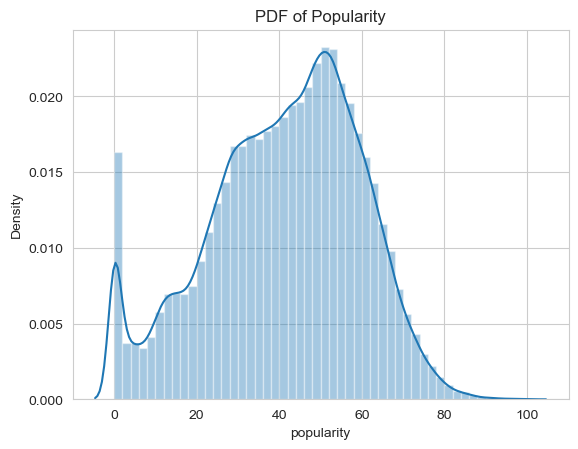

In [49]:
sns.distplot(df['popularity']).set_title('PDF of Popularity')

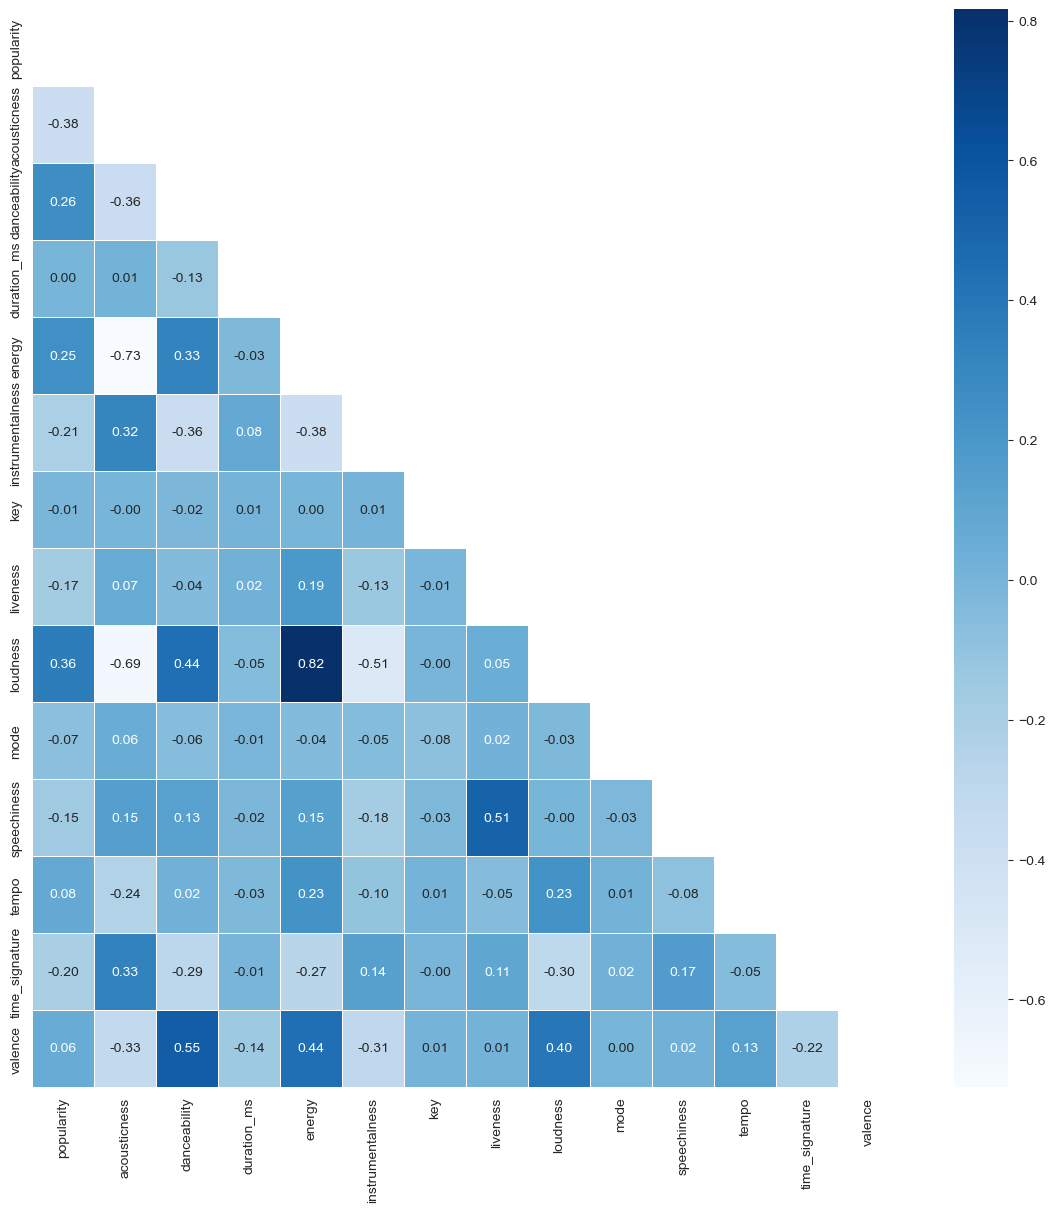

In [50]:
f,ax = plt.subplots(figsize=(14, 14))
mask = np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)] = True
sns.heatmap(df.corr(), annot=True, linewidths=0.4,linecolor="white", fmt= '.2f',ax=ax,cmap="Blues",mask=mask)
plt.show() 

We can see from the distribution plot that popularity follows a normal distribution with a spike at zero popularity. The strongest relationship is between energy and loudness, which makes sense intuitvely. Acousticness refers to music without electrical amplification so the strong negative relationship with loudness and energy checks out as well. Due to the chaotic nature of music taste, there are not many strong relationships between popularity and the features. The most prominent relationships for popularity are loudness, energy, danceability, and acousticness. Popularity is a numeric value ranging from 0 - 100 so rather than trying to predict a specific number given a song's audio features, we can convert popularity into a binary response variable. Although the mean for popularity is 41, a quick look at the probability distribution will show that the peak is around 50, which I believe would be a much better cut off point for our classification methods.

In [51]:
# Converting popularity into a binary response variable
df.loc[df['popularity'] < 50, 'popularity'] = 0 
df.loc[df['popularity'] >= 50, 'popularity'] = 1

In [52]:
# Checking that data was correctly transformed
df.sample(10)

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
204154,Soundtrack,Thomas Newman,Thrust,0ALLlLoTkHfNzocrzoZYEz,0,0.77100,0.2790,41840,0.1250,0.889000,5,0.128,-28.941,1,0.0396,105.484,0,0.0337
218187,World,Dean Evenson,Sound for Silence,6LeKkwhtbr2DSb6kNsfrDy,0,0.96300,0.0611,407520,0.0986,0.951000,10,0.110,-22.127,0,0.0395,61.903,2,0.0333
51734,Blues,Scott H. Biram,Swift Driftin',5jbJlsW0YothfDOAjKzbQx,0,0.56800,0.5100,163240,0.3350,0.001770,4,0.139,-8.764,1,0.0398,113.927,2,0.7760
220968,World,Shane & Shane,Without You,0vRlvfJs7JzBuMEaNPW8ri,0,0.00976,0.6300,233347,0.7630,0.000000,0,0.141,-5.858,0,0.0294,122.046,0,0.3650
84,Movie,Dominique Tirmont,La petite diligence,2y9CiiXaeZUdX3ZjsnkCVb,0,0.61100,0.7020,134093,0.5090,0.000000,4,0.900,-8.535,0,0.0685,92.235,0,0.7700
132405,Reggae,Bob Marley & The Wailers,Kinky Reggae - Original Album Version,7rzl3uAXLQMWznyVUaoeer,0,0.14600,0.8180,219267,0.5240,0.000424,10,0.121,-8.980,0,0.3930,137.578,0,0.6210
17558,Dance,Carrie Underwood,See You Again,7jP7iCJ1cXVXYHWIkYtP6d,1,0.27000,0.5140,246453,0.7420,0.000002,7,0.085,-2.525,1,0.0258,101.000,0,0.4700
61826,R&B,Leven Kali,Too High (feat. Buddy & Na'kel Smith),2xW35WcvWvj6Ygoc9jZa4i,0,0.18700,0.5940,205709,0.7740,0.000000,9,0.362,-5.082,1,0.1440,153.259,0,0.5770
160912,Reggaeton,Natti Natasha,New Day,63Hf7nmtwEfM1qSmX7HefP,0,0.01170,0.7530,190068,0.7220,0.004990,9,0.124,-5.537,1,0.0457,120.021,0,0.6220
16847,Dance,Yeah Yeah Yeahs,Heads Will Roll - A-Trak Remix Radio Edit,0vBpyfpW2lARGh3AZFtWRi,1,0.01720,0.7050,203920,0.8070,0.039200,7,0.232,-3.157,0,0.0845,132.025,0,0.8800


# Classification

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer, accuracy_score, roc_auc_score 

In [54]:
features = ["acousticness", "danceability", "duration_ms", "energy", "instrumentalness", "key", "liveness", 
            "mode", "speechiness", "tempo", "time_signature", "valence"]

In [55]:
X = df[features]
y = df['popularity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=500)

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=420)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=500)


In [57]:
X = df[features]
y = df['popularity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=500)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=500)

LR_Model = LogisticRegression()
LR_Model.fit(X_train, y_train)
LR_Predict = LR_Model.predict(X_valid)

LR_Accuracy = accuracy_score(y_valid, LR_Predict)
print("Accuracy: " + str(LR_Accuracy))

LR_AUC = roc_auc_score(y_valid, LR_Model.predict_proba(X_valid)[:,1]) 
print("AUC: " + str(LR_AUC))

Accuracy: 0.633311848748523
AUC: 0.49485492388259134


In [58]:
X = df[features]
y = df['popularity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=500)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=500)

DT_Model = DecisionTreeClassifier()
DT_Model.fit(X_train, y_train)
DT_Predict = DT_Model.predict(X_valid)

DT_Accuracy = accuracy_score(y_valid, DT_Predict)
print("Accuracy: " + str(DT_Accuracy))

DT_AUC = roc_auc_score(y_valid, DT_Model.predict_proba(X_valid)[:,1]) 
print("AUC: " + str(DT_AUC))

Accuracy: 0.7723708239338275
AUC: 0.7739933551317844


In [59]:
X = df[features]
y = df['popularity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=500)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=500)

RFC_Model = RandomForestClassifier()
RFC_Model.fit(X_train, y_train)
RFC_Predict = RFC_Model.predict(X_valid)

RFC_Accuracy = accuracy_score(y_valid, RFC_Predict)
print("Accuracy: " + str(RFC_Accuracy))

RFC_AUC = roc_auc_score(y_valid, RFC_Model.predict_proba(X_valid)[:,1]) 
print("AUC: " + str(RFC_AUC))

Accuracy: 0.8426791277258567
AUC: 0.9009620597532408


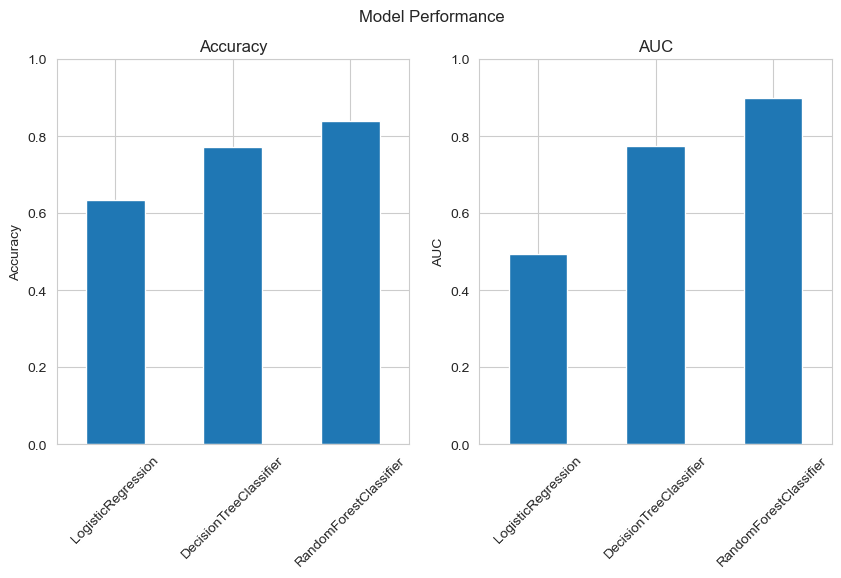

In [60]:
# Sort the data in ascending order by Accuracy column
model_performance_accuracy = model_performance_accuracy.sort_values(by='Accuracy')

# Create figure and subplots
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 5))

# Plot accuracy
model_performance_accuracy.plot(kind='bar', x='Model', y='Accuracy', ax=ax1, legend=False)
ax1.set_title('Accuracy')
ax1.set_ylim([0, 1])
ax1.set_xlabel('')
ax1.tick_params(axis='x', labelrotation=45)

# Sort the data in ascending order by AUC column
model_performance_AUC = model_performance_AUC.sort_values(by='AUC')

# Plot AUC
model_performance_AUC.plot(kind='bar', x='Model', y='AUC', ax=ax2, legend=False)
ax2.set_title('AUC')
ax2.set_ylim([0, 1])
ax2.set_xlabel('')
ax2.tick_params(axis='x', labelrotation=45)

ax1.set_ylabel('Accuracy')
ax2.set_ylabel('AUC')
fig.suptitle('Model Performance')

plt.show()


**Logistic Regression**

Logistic regression is a popular algorithm used in machine learning for classification problems. It is used when the target variable is categorical, such as 0 or 1, true or false, etc. The purpose of logistic regression is to find the best fit of a linear equation, called the logistic function, that can predict the probability of the target variable taking a particular value. Since the target variable, popularity, has two possible outputs, popular(1) and unpopular(0). Logistic regression is an appropriate classification method.

The logistic function, also known as the sigmoid function, is defined as:

$$ f(x) = \frac{1}{1 + e^{-x}} $$

where $x$ is the input to the function, and $e$ is the mathematical constant, Euler's number. The output of this function ranges from 0 to 1, representing the probability of the target variable being 0 or 1, respectively.

**Decision Tree**

A decision tree is a popular algorithm used in machine learning for both classification and regression problems. It is a type of supervised learning algorithm that builds a tree-like model of decisions and their possible outcomes. The tree is created by recursively splitting the data into subsets based on the value of a particular feature. Decision trees are able to handle both categorical and continuous features. However, they can be prone to overfitting, especially if there are too many irrelevant features.

A decision tree is represented by a set of decision nodes and leaf nodes. Each decision node represents a test on a particular feature, while each leaf node represents a class label or a regression value. The decision tree can be represented mathematically as:

$$ f(\mathbf{x}) = \sum_{i=1}^{n} c_i \mathbb{1}_{\{x \in R_i\}} $$

where $\mathbf{x}$ is the input vector, $n$ is the number of leaf nodes, $c_i$ is the value associated with the $i$-th leaf node, and $R_i$ is the region of input space associated with the $i$-th leaf node.

**Random Forest**

Random forest is a machine learning algorithm primarily used for classification and regression. It is an extension of the decision tree algorithm and works by creating multiple decision trees and aggregating their predictions. A set of decision trees are made by randomly selecting subsets of the features. Each tree is trained on a different subset of the data, and each node of the tree is split based on the best feature out of a random subset of features. The final prediction is obtained by choosing the highest selected option made by each tree. The random forest algorithm is less prone to overfitting than a single decision tree because the averaging of the predictions across multiple trees reduces the variance. Random forest can handle both categorical and continuous features. 

The Random Forest algorithm can be represented mathematically as:

$$ f(\mathbf{x}) = \frac{1}{N}\sum_{i=1}^{N}f_i(\mathbf{x}) $$

where $\mathbf{x}$ is the input vector, $N$ is the number of trees in the forest, and $f_i$ is the prediction of the $i$-th tree. 


**Conclusion**

Coming into this project, we originally thought that using audio features to predict music popularity would not have any significant results due to the chaotic nature of music and human prefernces. But we were pleased to learn that our random forest algorithm was able to accurately asses music as either popular or not popular with a success rate of 84%, followed by decision tree with 77%, and finally logistic regression with 63%. The most significant features for popular music were loudness, energy, and danceability. While the most significant features for unpopular music were acousticness and instrumentalness. Music with high energy and ability to be danced with lead to an increase in popularity, while songs without electrical amplification and no vocals lead to a decrease in popularity. This makes sense as there are more situations where people would want to listen to high energy with the ability to dance to it, in venues such as clubs, concerts, sporting events, and restaurants. Instrumental music applications are more niche which lead to a decrease in popularity.